In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/uciml/mushroom-classification

Attribute Information: (classes: edible=e, poisonous=p)

* **cap-shape**: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
* **cap-surface**: fibrous=f,grooves=g,scaly=y,smooth=s
* **cap-color**: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
* **bruises**: bruises=t,no=f
* **odor**: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
* **gill-attachment**: attached=a,descending=d,free=f,notched=n
* **gill-spacing**: close=c,crowded=w,distant=d
* **gill-size**: broad=b,narrow=n
* **gill-color**: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
* **stalk-shape**: enlarging=e,tapering=t
* **stalk-root**: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
* **stalk-surface-above-ring**: fibrous=f,scaly=y,silky=k,smooth=s
* **stalk-surface-below-ring**: fibrous=f,scaly=y,silky=k,smooth=s
* **stalk-color-above-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* **stalk-color-below-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* **veil-type**: partial=p,universal=u
* **veil-color**: brown=n,orange=o,white=w,yellow=y
* **ring-number**: none=n,one=o,two=t
* **ring-type**: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
* **spore-print-color**: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
* **population**: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
* **habitat**: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

No missing values so that's good.

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
df['class'].value_counts() / df['class'].count()

e    0.517971
p    0.482029
Name: class, dtype: float64

We can see that the edible and poisonous mushrooms are rather equally distributed so no need to balance them further.

Now let's explore each feature a bit. Let's see how the values of each feature are distributed, split by the mushroom class (edible, poisonous).

In [7]:
features = df.columns[1:]
print(features)

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [8]:
plt.style.use('lenk_style') # my custom style sheet

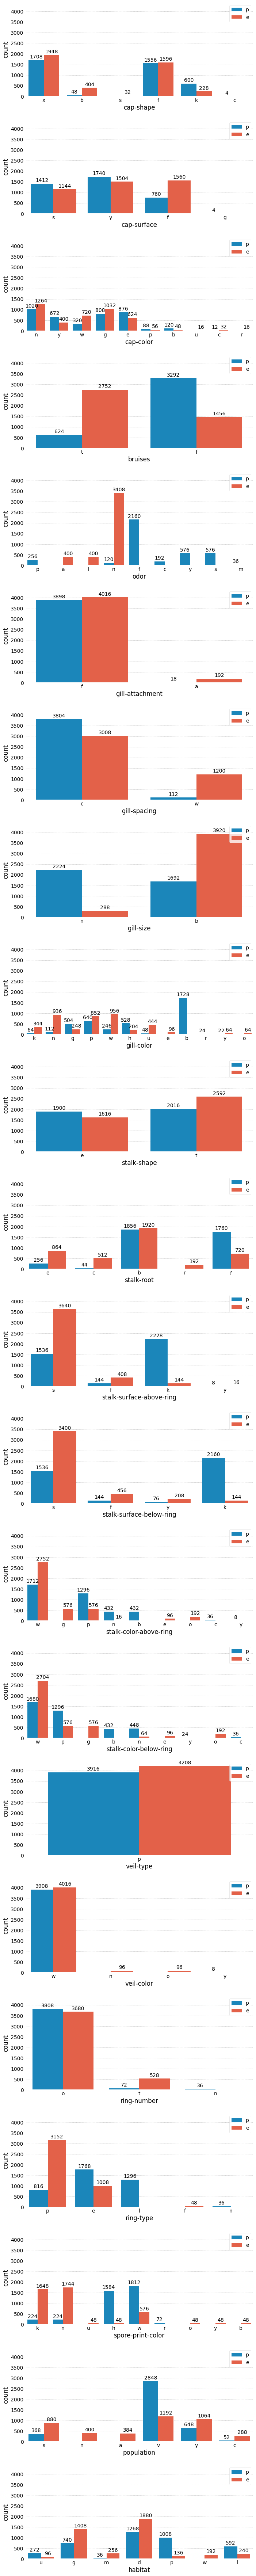

In [9]:
fig, ax = plt.subplots(len(features), 1, figsize=(10,120), sharey=True) 
plt.subplots_adjust(hspace=.25)

for i in range(len(features)):
    s = sns.countplot(x=features[i], data=df, hue='class', ax=ax[i])
    
    ax[i].set_xlabel(features[i])
    ax[i].set_ylabel('count')
    ax[i].legend(loc=1)
        
    for p in s.patches: # for each column on a chart
        s.annotate(format(p.get_height(), '.0f'),
                   # (column's left edge + column witdh) / 2
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center',
                   va='center',
                   xytext=(0, 9), textcoords='offset points')

We can see that some of the features alone are pretty good predictors of a mushroom being edible or poisonous. For example, poisonous mushrooms have foul, fishy and spicy odours.

# Data prep

Now let's prepare the data for the models.

First, let's prepare x (features) and y (target) variables. For the target, I'm going to right away map the 'p' and 'e' to 1 and 0 respectively.

In [10]:
# Creating independent and dependent variables
x = df.iloc[:,1:].values
y = df.iloc[:,0].map({'p':1, 'e':0}).values

In [11]:
x

array([['x', 's', 'n', ..., 'k', 's', 'u'],
       ['x', 's', 'y', ..., 'n', 'n', 'g'],
       ['b', 's', 'w', ..., 'n', 'n', 'm'],
       ...,
       ['f', 's', 'n', ..., 'b', 'c', 'l'],
       ['k', 'y', 'n', ..., 'w', 'v', 'l'],
       ['x', 's', 'n', ..., 'o', 'c', 'l']], dtype=object)

In [12]:
y

array([1, 0, 0, ..., 0, 1, 0])

For all the features, we need to apply one-hot encoding since, at the moment, they contain the letter coding.

In [13]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
x = onehotencoder.fit_transform(x).toarray()

Let's check the result.

In [14]:
print(len(x[0]))
x[0]

117


array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

As a result of the one-hot encoding, one mushroom has 117 characteristics which is a lot. We'll deal with that shortly.

Let's proceed with splitting the data into test and training sets.

In [15]:
from sklearn.model_selection import train_test_split

random_state=42 # creating a variable which I can later use in the models as well
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)

Now let's apply principal component analysis to reduce the dimensionality of the data (currently 117). I'll go with having 2 components.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [17]:
x_train[0]

array([ 2.03562146, -1.37131495])

In [18]:
x_test[0]

array([-0.45288873, -0.74829767])

Excellent, now we are ready to test out the performance of all the different models.

## Visualising the training set

In [19]:
train = pd.DataFrame(x_train, columns=['PC1', 'PC2'])
train['p'] = y_train

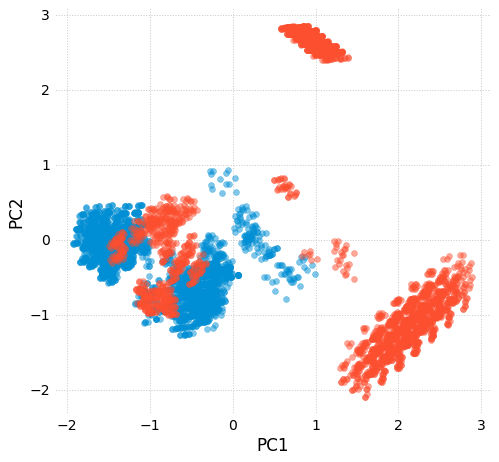

In [20]:
plt.subplots(figsize=(7,7))

plt.scatter(x=train.loc[train['p']==0, 'PC1'], y=train.loc[train['p']==0, 'PC2'], alpha=.5, label='edible')
plt.scatter(x=train.loc[train['p']==1, 'PC1'], y=train.loc[train['p']==1, 'PC2'], alpha=.5, label='poisonous')

plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.legend()

# plt.savefig('mushrooms.png', bbox_inches='tight', dpi=400)

plt.show()

# Trying different methods

For the model metrics (confusion matrics and accuracy), I'll write a function which I cal reuse. I will also store each model's accuracy in a dictionary.

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

acscore = {}

def model_metrics(input_classifier, model_name):
    y_pred = classifier.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)
    acscore[model_name] = ac
    return cm, ac

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=random_state)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
model_metrics(classifier, 'LogisticRegression')

(array([[798,  45],
        [169, 613]]),
 0.8683076923076923)

## K-Nearest Neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
model_metrics(classifier, 'KNeighborsClassifier')

(array([[823,  20],
        [ 47, 735]]),
 0.9587692307692308)

## Kernel SVM

In [26]:
# Training the RBF Kernel SVC on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=random_state)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [27]:
model_metrics(classifier, 'KernelSVM')

(array([[839,   4],
        [121, 661]]),
 0.9230769230769231)

## Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
model_metrics(classifier, 'NaiveBeyes')

(array([[810,  33],
        [169, 613]]),
 0.8756923076923077)

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=random_state)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [31]:
model_metrics(classifier, 'DecisionTreeClassifier')

(array([[817,  26],
        [ 34, 748]]),
 0.963076923076923)

In [32]:
# the count of true negatives is , false negatives is , true positives is  and false positives is .

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=random_state)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
model_metrics(classifier, 'RandomForestClassifier')

(array([[831,  12],
        [ 42, 740]]),
 0.9667692307692307)

# Summary

In [35]:
# sorting the dictionary by value
acscore = dict(sorted(acscore.items(), key=lambda item: item[1]))

In [36]:
acscore

{'LogisticRegression': 0.8683076923076923,
 'NaiveBeyes': 0.8756923076923077,
 'KernelSVM': 0.9230769230769231,
 'KNeighborsClassifier': 0.9587692307692308,
 'DecisionTreeClassifier': 0.963076923076923,
 'RandomForestClassifier': 0.9667692307692307}

It looks like the Random Forest performed the best but Decision Tree and K-Nearest are not far behind. Logistic regression, the only linear model here, performed the worst.

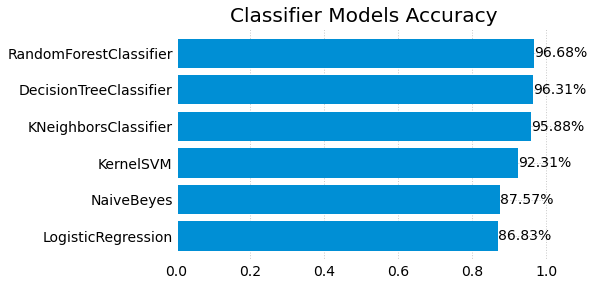

In [37]:
plt.barh(list(acscore.keys()), list(acscore.values()), align='center')

for i, v in enumerate(acscore.values()):
    plt.text(x=v, y=i, s=str(round(v*100, 2))+'%', va='center', ha='left')
    
plt.title('Classifier Models Accuracy')

plt.show()